In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

import graphviz # needed to visualize trained decision tree
from sklearn.tree import export_graphviz # needed to visualize trained decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import f1_score
from sklearn import neighbors

plt.style.use('ggplot')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
data = pd.read_csv('2012-18_officialBoxScore.csv', delimiter = ',')

data.head(15)

,gmDate,gmTime,seasTyp,offLNm,offFNm,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,...,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
0,2012-10-30,19:00,Regular,Brothers,Tony,WAS,East,Southeast,Away,Loss,...,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
1,2012-10-30,19:00,Regular,Smith,Michael,WAS,East,Southeast,Away,Loss,...,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
2,2012-10-30,19:00,Regular,Workman,Haywoode,WAS,East,Southeast,Away,Loss,...,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
3,2012-10-30,19:00,Regular,Brothers,Tony,CLE,East,Central,Home,Win,...,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,88.9409,88.9409
4,2012-10-30,19:00,Regular,Smith,Michael,CLE,East,Central,Home,Win,...,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,88.9409,88.9409
5,2012-10-30,19:00,Regular,Workman,Haywoode,CLE,East,Central,Home,Win,...,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,88.9409,88.9409
6,2012-10-30,20:00,Regular,McCutchen,Monty,BOS,East,Atlantic,Away,Loss,...,80.8333,126.3381,112.6515,13.6866,0.5244,19.8287,3.1250,100.0000,94.9832,94.9832
7,2012-10-30,20:00,Regular,Wright,Sean,BOS,East,Atlantic,Away,Loss,...,80.8333,126.3381,112.6515,13.6866,0.5244,19.8287,3.1250,100.0000,94.9832,94.9832
8,2012-10-30,20:00,Regular,Fitzgerald,Kane,BOS,East,Atlantic,Away,Loss,...,80.8333,126.3381,112.6515,13.6866,0.5244,19.8287,3.1250,100.0000,94.9832,94.9832
9,2012-10-30,20:00,Regular,McCutchen,Monty,MIA,East,Southeast,Home,Win,...,62.7083,112.6515,126.3381,-13.6866,0.4643,18.8501,1.5000,25.0000,94.9832,94.9832


In [4]:
# DON'T RERUN THIS UNLESS YOU NEED TO IDIOT
# AAAAAAAAAAAAAAA STOP NO

data2 = data.copy(deep=True)
for i, j in data.iterrows():
    if (i % 3 == 1 or i % 3 == 2):
        print(i, 'deleted')
        data2 = data2.drop(data.index[i])



1 deleted
2 deleted
4 deleted
5 deleted
7 deleted
8 deleted
10 deleted
11 deleted
13 deleted
14 deleted
16 deleted
17 deleted
19 deleted
20 deleted
22 deleted
23 deleted
25 deleted
26 deleted
28 deleted
29 deleted
31 deleted
32 deleted
34 deleted
35 deleted
37 deleted
38 deleted
40 deleted
41 deleted
43 deleted
44 deleted
46 deleted
47 deleted
49 deleted
50 deleted
52 deleted
53 deleted
55 deleted
56 deleted
58 deleted
59 deleted
61 deleted
62 deleted
64 deleted
65 deleted
67 deleted
68 deleted
70 deleted
71 deleted
73 deleted
74 deleted
76 deleted
77 deleted
79 deleted
80 deleted
82 deleted
83 deleted
85 deleted
86 deleted
88 deleted
89 deleted
91 deleted
92 deleted
94 deleted
95 deleted
97 deleted
98 deleted
100 deleted
101 deleted
103 deleted
104 deleted
106 deleted
107 deleted
109 deleted
110 deleted
112 deleted
113 deleted
115 deleted
116 deleted
118 deleted
119 deleted
121 deleted
122 deleted
124 deleted
125 deleted
127 deleted
128 deleted
130 deleted
131 deleted
133 deleted
134 

1043 deleted
1045 deleted
1046 deleted
1048 deleted
1049 deleted
1051 deleted
1052 deleted
1054 deleted
1055 deleted
1057 deleted
1058 deleted
1060 deleted
1061 deleted
1063 deleted
1064 deleted
1066 deleted
1067 deleted
1069 deleted
1070 deleted
1072 deleted
1073 deleted
1075 deleted
1076 deleted
1078 deleted
1079 deleted
1081 deleted
1082 deleted
1084 deleted
1085 deleted
1087 deleted
1088 deleted
1090 deleted
1091 deleted
1093 deleted
1094 deleted
1096 deleted
1097 deleted
1099 deleted
1100 deleted
1102 deleted
1103 deleted
1105 deleted
1106 deleted
1108 deleted
1109 deleted
1111 deleted
1112 deleted
1114 deleted
1115 deleted
1117 deleted
1118 deleted
1120 deleted
1121 deleted
1123 deleted
1124 deleted
1126 deleted
1127 deleted
1129 deleted
1130 deleted
1132 deleted
1133 deleted
1135 deleted
1136 deleted
1138 deleted
1139 deleted
1141 deleted
1142 deleted
1144 deleted
1145 deleted
1147 deleted
1148 deleted
1150 deleted
1151 deleted
1153 deleted
1154 deleted
1156 deleted
1157 deleted

2002 deleted
2003 deleted
2005 deleted
2006 deleted
2008 deleted
2009 deleted
2011 deleted
2012 deleted
2014 deleted
2015 deleted
2017 deleted
2018 deleted
2020 deleted
2021 deleted
2023 deleted
2024 deleted
2026 deleted
2027 deleted
2029 deleted
2030 deleted
2032 deleted
2033 deleted
2035 deleted
2036 deleted
2038 deleted
2039 deleted
2041 deleted
2042 deleted
2044 deleted
2045 deleted
2047 deleted
2048 deleted
2050 deleted
2051 deleted
2053 deleted
2054 deleted
2056 deleted
2057 deleted
2059 deleted
2060 deleted
2062 deleted
2063 deleted
2065 deleted
2066 deleted
2068 deleted
2069 deleted
2071 deleted
2072 deleted
2074 deleted
2075 deleted
2077 deleted
2078 deleted
2080 deleted
2081 deleted
2083 deleted
2084 deleted
2086 deleted
2087 deleted
2089 deleted
2090 deleted
2092 deleted
2093 deleted
2095 deleted
2096 deleted
2098 deleted
2099 deleted
2101 deleted
2102 deleted
2104 deleted
2105 deleted
2107 deleted
2108 deleted
2110 deleted
2111 deleted
2113 deleted
2114 deleted
2116 deleted

2954 deleted
2956 deleted
2957 deleted
2959 deleted
2960 deleted
2962 deleted
2963 deleted
2965 deleted
2966 deleted
2968 deleted
2969 deleted
2971 deleted
2972 deleted
2974 deleted
2975 deleted
2977 deleted
2978 deleted
2980 deleted
2981 deleted
2983 deleted
2984 deleted
2986 deleted
2987 deleted
2989 deleted
2990 deleted
2992 deleted
2993 deleted
2995 deleted
2996 deleted
2998 deleted
2999 deleted
3001 deleted
3002 deleted
3004 deleted
3005 deleted
3007 deleted
3008 deleted
3010 deleted
3011 deleted
3013 deleted
3014 deleted
3016 deleted
3017 deleted
3019 deleted
3020 deleted
3022 deleted
3023 deleted
3025 deleted
3026 deleted
3028 deleted
3029 deleted
3031 deleted
3032 deleted
3034 deleted
3035 deleted
3037 deleted
3038 deleted
3040 deleted
3041 deleted
3043 deleted
3044 deleted
3046 deleted
3047 deleted
3049 deleted
3050 deleted
3052 deleted
3053 deleted
3055 deleted
3056 deleted
3058 deleted
3059 deleted
3061 deleted
3062 deleted
3064 deleted
3065 deleted
3067 deleted
3068 deleted

3923 deleted
3925 deleted
3926 deleted
3928 deleted
3929 deleted
3931 deleted
3932 deleted
3934 deleted
3935 deleted
3937 deleted
3938 deleted
3940 deleted
3941 deleted
3943 deleted
3944 deleted
3946 deleted
3947 deleted
3949 deleted
3950 deleted
3952 deleted
3953 deleted
3955 deleted
3956 deleted
3958 deleted
3959 deleted
3961 deleted
3962 deleted
3964 deleted
3965 deleted
3967 deleted
3968 deleted
3970 deleted
3971 deleted
3973 deleted
3974 deleted
3976 deleted
3977 deleted
3979 deleted
3980 deleted
3982 deleted
3983 deleted
3985 deleted
3986 deleted
3988 deleted
3989 deleted
3991 deleted
3992 deleted
3994 deleted
3995 deleted
3997 deleted
3998 deleted
4000 deleted
4001 deleted
4003 deleted
4004 deleted
4006 deleted
4007 deleted
4009 deleted
4010 deleted
4012 deleted
4013 deleted
4015 deleted
4016 deleted
4018 deleted
4019 deleted
4021 deleted
4022 deleted
4024 deleted
4025 deleted
4027 deleted
4028 deleted
4030 deleted
4031 deleted
4033 deleted
4034 deleted
4036 deleted
4037 deleted

4873 deleted
4874 deleted
4876 deleted
4877 deleted
4879 deleted
4880 deleted
4882 deleted
4883 deleted
4885 deleted
4886 deleted
4888 deleted
4889 deleted
4891 deleted
4892 deleted
4894 deleted
4895 deleted
4897 deleted
4898 deleted
4900 deleted
4901 deleted
4903 deleted
4904 deleted
4906 deleted
4907 deleted
4909 deleted
4910 deleted
4912 deleted
4913 deleted
4915 deleted
4916 deleted
4918 deleted
4919 deleted
4921 deleted
4922 deleted
4924 deleted
4925 deleted
4927 deleted
4928 deleted
4930 deleted
4931 deleted
4933 deleted
4934 deleted
4936 deleted
4937 deleted
4939 deleted
4940 deleted
4942 deleted
4943 deleted
4945 deleted
4946 deleted
4948 deleted
4949 deleted
4951 deleted
4952 deleted
4954 deleted
4955 deleted
4957 deleted
4958 deleted
4960 deleted
4961 deleted
4963 deleted
4964 deleted
4966 deleted
4967 deleted
4969 deleted
4970 deleted
4972 deleted
4973 deleted
4975 deleted
4976 deleted
4978 deleted
4979 deleted
4981 deleted
4982 deleted
4984 deleted
4985 deleted
4987 deleted

5828 deleted
5830 deleted
5831 deleted
5833 deleted
5834 deleted
5836 deleted
5837 deleted
5839 deleted
5840 deleted
5842 deleted
5843 deleted
5845 deleted
5846 deleted
5848 deleted
5849 deleted
5851 deleted
5852 deleted
5854 deleted
5855 deleted
5857 deleted
5858 deleted
5860 deleted
5861 deleted
5863 deleted
5864 deleted
5866 deleted
5867 deleted
5869 deleted
5870 deleted
5872 deleted
5873 deleted
5875 deleted
5876 deleted
5878 deleted
5879 deleted
5881 deleted
5882 deleted
5884 deleted
5885 deleted
5887 deleted
5888 deleted
5890 deleted
5891 deleted
5893 deleted
5894 deleted
5896 deleted
5897 deleted
5899 deleted
5900 deleted
5902 deleted
5903 deleted
5905 deleted
5906 deleted
5908 deleted
5909 deleted
5911 deleted
5912 deleted
5914 deleted
5915 deleted
5917 deleted
5918 deleted
5920 deleted
5921 deleted
5923 deleted
5924 deleted
5926 deleted
5927 deleted
5929 deleted
5930 deleted
5932 deleted
5933 deleted
5935 deleted
5936 deleted
5938 deleted
5939 deleted
5941 deleted
5942 deleted

6785 deleted
6787 deleted
6788 deleted
6790 deleted
6791 deleted
6793 deleted
6794 deleted
6796 deleted
6797 deleted
6799 deleted
6800 deleted
6802 deleted
6803 deleted
6805 deleted
6806 deleted
6808 deleted
6809 deleted
6811 deleted
6812 deleted
6814 deleted
6815 deleted
6817 deleted
6818 deleted
6820 deleted
6821 deleted
6823 deleted
6824 deleted
6826 deleted
6827 deleted
6829 deleted
6830 deleted
6832 deleted
6833 deleted
6835 deleted
6836 deleted
6838 deleted
6839 deleted
6841 deleted
6842 deleted
6844 deleted
6845 deleted
6847 deleted
6848 deleted
6850 deleted
6851 deleted
6853 deleted
6854 deleted
6856 deleted
6857 deleted
6859 deleted
6860 deleted
6862 deleted
6863 deleted
6865 deleted
6866 deleted
6868 deleted
6869 deleted
6871 deleted
6872 deleted
6874 deleted
6875 deleted
6877 deleted
6878 deleted
6880 deleted
6881 deleted
6883 deleted
6884 deleted
6886 deleted
6887 deleted
6889 deleted
6890 deleted
6892 deleted
6893 deleted
6895 deleted
6896 deleted
6898 deleted
6899 deleted

7754 deleted
7756 deleted
7757 deleted
7759 deleted
7760 deleted
7762 deleted
7763 deleted
7765 deleted
7766 deleted
7768 deleted
7769 deleted
7771 deleted
7772 deleted
7774 deleted
7775 deleted
7777 deleted
7778 deleted
7780 deleted
7781 deleted
7783 deleted
7784 deleted
7786 deleted
7787 deleted
7789 deleted
7790 deleted
7792 deleted
7793 deleted
7795 deleted
7796 deleted
7798 deleted
7799 deleted
7801 deleted
7802 deleted
7804 deleted
7805 deleted
7807 deleted
7808 deleted
7810 deleted
7811 deleted
7813 deleted
7814 deleted
7816 deleted
7817 deleted
7819 deleted
7820 deleted
7822 deleted
7823 deleted
7825 deleted
7826 deleted
7828 deleted
7829 deleted
7831 deleted
7832 deleted
7834 deleted
7835 deleted
7837 deleted
7838 deleted
7840 deleted
7841 deleted
7843 deleted
7844 deleted
7846 deleted
7847 deleted
7849 deleted
7850 deleted
7852 deleted
7853 deleted
7855 deleted
7856 deleted
7858 deleted
7859 deleted
7861 deleted
7862 deleted
7864 deleted
7865 deleted
7867 deleted
7868 deleted

8716 deleted
8717 deleted
8719 deleted
8720 deleted
8722 deleted
8723 deleted
8725 deleted
8726 deleted
8728 deleted
8729 deleted
8731 deleted
8732 deleted
8734 deleted
8735 deleted
8737 deleted
8738 deleted
8740 deleted
8741 deleted
8743 deleted
8744 deleted
8746 deleted
8747 deleted
8749 deleted
8750 deleted
8752 deleted
8753 deleted
8755 deleted
8756 deleted
8758 deleted
8759 deleted
8761 deleted
8762 deleted
8764 deleted
8765 deleted
8767 deleted
8768 deleted
8770 deleted
8771 deleted
8773 deleted
8774 deleted
8776 deleted
8777 deleted
8779 deleted
8780 deleted
8782 deleted
8783 deleted
8785 deleted
8786 deleted
8788 deleted
8789 deleted
8791 deleted
8792 deleted
8794 deleted
8795 deleted
8797 deleted
8798 deleted
8800 deleted
8801 deleted
8803 deleted
8804 deleted
8806 deleted
8807 deleted
8809 deleted
8810 deleted
8812 deleted
8813 deleted
8815 deleted
8816 deleted
8818 deleted
8819 deleted
8821 deleted
8822 deleted
8824 deleted
8825 deleted
8827 deleted
8828 deleted
8830 deleted

9679 deleted
9680 deleted
9682 deleted
9683 deleted
9685 deleted
9686 deleted
9688 deleted
9689 deleted
9691 deleted
9692 deleted
9694 deleted
9695 deleted
9697 deleted
9698 deleted
9700 deleted
9701 deleted
9703 deleted
9704 deleted
9706 deleted
9707 deleted
9709 deleted
9710 deleted
9712 deleted
9713 deleted
9715 deleted
9716 deleted
9718 deleted
9719 deleted
9721 deleted
9722 deleted
9724 deleted
9725 deleted
9727 deleted
9728 deleted
9730 deleted
9731 deleted
9733 deleted
9734 deleted
9736 deleted
9737 deleted
9739 deleted
9740 deleted
9742 deleted
9743 deleted
9745 deleted
9746 deleted
9748 deleted
9749 deleted
9751 deleted
9752 deleted
9754 deleted
9755 deleted
9757 deleted
9758 deleted
9760 deleted
9761 deleted
9763 deleted
9764 deleted
9766 deleted
9767 deleted
9769 deleted
9770 deleted
9772 deleted
9773 deleted
9775 deleted
9776 deleted
9778 deleted
9779 deleted
9781 deleted
9782 deleted
9784 deleted
9785 deleted
9787 deleted
9788 deleted
9790 deleted
9791 deleted
9793 deleted

10588 deleted
10589 deleted
10591 deleted
10592 deleted
10594 deleted
10595 deleted
10597 deleted
10598 deleted
10600 deleted
10601 deleted
10603 deleted
10604 deleted
10606 deleted
10607 deleted
10609 deleted
10610 deleted
10612 deleted
10613 deleted
10615 deleted
10616 deleted
10618 deleted
10619 deleted
10621 deleted
10622 deleted
10624 deleted
10625 deleted
10627 deleted
10628 deleted
10630 deleted
10631 deleted
10633 deleted
10634 deleted
10636 deleted
10637 deleted
10639 deleted
10640 deleted
10642 deleted
10643 deleted
10645 deleted
10646 deleted
10648 deleted
10649 deleted
10651 deleted
10652 deleted
10654 deleted
10655 deleted
10657 deleted
10658 deleted
10660 deleted
10661 deleted
10663 deleted
10664 deleted
10666 deleted
10667 deleted
10669 deleted
10670 deleted
10672 deleted
10673 deleted
10675 deleted
10676 deleted
10678 deleted
10679 deleted
10681 deleted
10682 deleted
10684 deleted
10685 deleted
10687 deleted
10688 deleted
10690 deleted
10691 deleted
10693 deleted
10694 

11477 deleted
11479 deleted
11480 deleted
11482 deleted
11483 deleted
11485 deleted
11486 deleted
11488 deleted
11489 deleted
11491 deleted
11492 deleted
11494 deleted
11495 deleted
11497 deleted
11498 deleted
11500 deleted
11501 deleted
11503 deleted
11504 deleted
11506 deleted
11507 deleted
11509 deleted
11510 deleted
11512 deleted
11513 deleted
11515 deleted
11516 deleted
11518 deleted
11519 deleted
11521 deleted
11522 deleted
11524 deleted
11525 deleted
11527 deleted
11528 deleted
11530 deleted
11531 deleted
11533 deleted
11534 deleted
11536 deleted
11537 deleted
11539 deleted
11540 deleted
11542 deleted
11543 deleted
11545 deleted
11546 deleted
11548 deleted
11549 deleted
11551 deleted
11552 deleted
11554 deleted
11555 deleted
11557 deleted
11558 deleted
11560 deleted
11561 deleted
11563 deleted
11564 deleted
11566 deleted
11567 deleted
11569 deleted
11570 deleted
11572 deleted
11573 deleted
11575 deleted
11576 deleted
11578 deleted
11579 deleted
11581 deleted
11582 deleted
11584 

12356 deleted
12358 deleted
12359 deleted
12361 deleted
12362 deleted
12364 deleted
12365 deleted
12367 deleted
12368 deleted
12370 deleted
12371 deleted
12373 deleted
12374 deleted
12376 deleted
12377 deleted
12379 deleted
12380 deleted
12382 deleted
12383 deleted
12385 deleted
12386 deleted
12388 deleted
12389 deleted
12391 deleted
12392 deleted
12394 deleted
12395 deleted
12397 deleted
12398 deleted
12400 deleted
12401 deleted
12403 deleted
12404 deleted
12406 deleted
12407 deleted
12409 deleted
12410 deleted
12412 deleted
12413 deleted
12415 deleted
12416 deleted
12418 deleted
12419 deleted
12421 deleted
12422 deleted
12424 deleted
12425 deleted
12427 deleted
12428 deleted
12430 deleted
12431 deleted
12433 deleted
12434 deleted
12436 deleted
12437 deleted
12439 deleted
12440 deleted
12442 deleted
12443 deleted
12445 deleted
12446 deleted
12448 deleted
12449 deleted
12451 deleted
12452 deleted
12454 deleted
12455 deleted
12457 deleted
12458 deleted
12460 deleted
12461 deleted
12463 

13243 deleted
13244 deleted
13246 deleted
13247 deleted
13249 deleted
13250 deleted
13252 deleted
13253 deleted
13255 deleted
13256 deleted
13258 deleted
13259 deleted
13261 deleted
13262 deleted
13264 deleted
13265 deleted
13267 deleted
13268 deleted
13270 deleted
13271 deleted
13273 deleted
13274 deleted
13276 deleted
13277 deleted
13279 deleted
13280 deleted
13282 deleted
13283 deleted
13285 deleted
13286 deleted
13288 deleted
13289 deleted
13291 deleted
13292 deleted
13294 deleted
13295 deleted
13297 deleted
13298 deleted
13300 deleted
13301 deleted
13303 deleted
13304 deleted
13306 deleted
13307 deleted
13309 deleted
13310 deleted
13312 deleted
13313 deleted
13315 deleted
13316 deleted
13318 deleted
13319 deleted
13321 deleted
13322 deleted
13324 deleted
13325 deleted
13327 deleted
13328 deleted
13330 deleted
13331 deleted
13333 deleted
13334 deleted
13336 deleted
13337 deleted
13339 deleted
13340 deleted
13342 deleted
13343 deleted
13345 deleted
13346 deleted
13348 deleted
13349 

14123 deleted
14125 deleted
14126 deleted
14128 deleted
14129 deleted
14131 deleted
14132 deleted
14134 deleted
14135 deleted
14137 deleted
14138 deleted
14140 deleted
14141 deleted
14143 deleted
14144 deleted
14146 deleted
14147 deleted
14149 deleted
14150 deleted
14152 deleted
14153 deleted
14155 deleted
14156 deleted
14158 deleted
14159 deleted
14161 deleted
14162 deleted
14164 deleted
14165 deleted
14167 deleted
14168 deleted
14170 deleted
14171 deleted
14173 deleted
14174 deleted
14176 deleted
14177 deleted
14179 deleted
14180 deleted
14182 deleted
14183 deleted
14185 deleted
14186 deleted
14188 deleted
14189 deleted
14191 deleted
14192 deleted
14194 deleted
14195 deleted
14197 deleted
14198 deleted
14200 deleted
14201 deleted
14203 deleted
14204 deleted
14206 deleted
14207 deleted
14209 deleted
14210 deleted
14212 deleted
14213 deleted
14215 deleted
14216 deleted
14218 deleted
14219 deleted
14221 deleted
14222 deleted
14224 deleted
14225 deleted
14227 deleted
14228 deleted
14230 

15008 deleted
15010 deleted
15011 deleted
15013 deleted
15014 deleted
15016 deleted
15017 deleted
15019 deleted
15020 deleted
15022 deleted
15023 deleted
15025 deleted
15026 deleted
15028 deleted
15029 deleted
15031 deleted
15032 deleted
15034 deleted
15035 deleted
15037 deleted
15038 deleted
15040 deleted
15041 deleted
15043 deleted
15044 deleted
15046 deleted
15047 deleted
15049 deleted
15050 deleted
15052 deleted
15053 deleted
15055 deleted
15056 deleted
15058 deleted
15059 deleted
15061 deleted
15062 deleted
15064 deleted
15065 deleted
15067 deleted
15068 deleted
15070 deleted
15071 deleted
15073 deleted
15074 deleted
15076 deleted
15077 deleted
15079 deleted
15080 deleted
15082 deleted
15083 deleted
15085 deleted
15086 deleted
15088 deleted
15089 deleted
15091 deleted
15092 deleted
15094 deleted
15095 deleted
15097 deleted
15098 deleted
15100 deleted
15101 deleted
15103 deleted
15104 deleted
15106 deleted
15107 deleted
15109 deleted
15110 deleted
15112 deleted
15113 deleted
15115 

15910 deleted
15911 deleted
15913 deleted
15914 deleted
15916 deleted
15917 deleted
15919 deleted
15920 deleted
15922 deleted
15923 deleted
15925 deleted
15926 deleted
15928 deleted
15929 deleted
15931 deleted
15932 deleted
15934 deleted
15935 deleted
15937 deleted
15938 deleted
15940 deleted
15941 deleted
15943 deleted
15944 deleted
15946 deleted
15947 deleted
15949 deleted
15950 deleted
15952 deleted
15953 deleted
15955 deleted
15956 deleted
15958 deleted
15959 deleted
15961 deleted
15962 deleted
15964 deleted
15965 deleted
15967 deleted
15968 deleted
15970 deleted
15971 deleted
15973 deleted
15974 deleted
15976 deleted
15977 deleted
15979 deleted
15980 deleted
15982 deleted
15983 deleted
15985 deleted
15986 deleted
15988 deleted
15989 deleted
15991 deleted
15992 deleted
15994 deleted
15995 deleted
15997 deleted
15998 deleted
16000 deleted
16001 deleted
16003 deleted
16004 deleted
16006 deleted
16007 deleted
16009 deleted
16010 deleted
16012 deleted
16013 deleted
16015 deleted
16016 

16789 deleted
16790 deleted
16792 deleted
16793 deleted
16795 deleted
16796 deleted
16798 deleted
16799 deleted
16801 deleted
16802 deleted
16804 deleted
16805 deleted
16807 deleted
16808 deleted
16810 deleted
16811 deleted
16813 deleted
16814 deleted
16816 deleted
16817 deleted
16819 deleted
16820 deleted
16822 deleted
16823 deleted
16825 deleted
16826 deleted
16828 deleted
16829 deleted
16831 deleted
16832 deleted
16834 deleted
16835 deleted
16837 deleted
16838 deleted
16840 deleted
16841 deleted
16843 deleted
16844 deleted
16846 deleted
16847 deleted
16849 deleted
16850 deleted
16852 deleted
16853 deleted
16855 deleted
16856 deleted
16858 deleted
16859 deleted
16861 deleted
16862 deleted
16864 deleted
16865 deleted
16867 deleted
16868 deleted
16870 deleted
16871 deleted
16873 deleted
16874 deleted
16876 deleted
16877 deleted
16879 deleted
16880 deleted
16882 deleted
16883 deleted
16885 deleted
16886 deleted
16888 deleted
16889 deleted
16891 deleted
16892 deleted
16894 deleted
16895 

17686 deleted
17687 deleted
17689 deleted
17690 deleted
17692 deleted
17693 deleted
17695 deleted
17696 deleted
17698 deleted
17699 deleted
17701 deleted
17702 deleted
17704 deleted
17705 deleted
17707 deleted
17708 deleted
17710 deleted
17711 deleted
17713 deleted
17714 deleted
17716 deleted
17717 deleted
17719 deleted
17720 deleted
17722 deleted
17723 deleted
17725 deleted
17726 deleted
17728 deleted
17729 deleted
17731 deleted
17732 deleted
17734 deleted
17735 deleted
17737 deleted
17738 deleted
17740 deleted
17741 deleted
17743 deleted
17744 deleted
17746 deleted
17747 deleted
17749 deleted
17750 deleted
17752 deleted
17753 deleted
17755 deleted
17756 deleted
17758 deleted
17759 deleted
17761 deleted
17762 deleted
17764 deleted
17765 deleted
17767 deleted
17768 deleted
17770 deleted
17771 deleted
17773 deleted
17774 deleted
17776 deleted
17777 deleted
17779 deleted
17780 deleted
17782 deleted
17783 deleted
17785 deleted
17786 deleted
17788 deleted
17789 deleted
17791 deleted
17792 

18575 deleted
18577 deleted
18578 deleted
18580 deleted
18581 deleted
18583 deleted
18584 deleted
18586 deleted
18587 deleted
18589 deleted
18590 deleted
18592 deleted
18593 deleted
18595 deleted
18596 deleted
18598 deleted
18599 deleted
18601 deleted
18602 deleted
18604 deleted
18605 deleted
18607 deleted
18608 deleted
18610 deleted
18611 deleted
18613 deleted
18614 deleted
18616 deleted
18617 deleted
18619 deleted
18620 deleted
18622 deleted
18623 deleted
18625 deleted
18626 deleted
18628 deleted
18629 deleted
18631 deleted
18632 deleted
18634 deleted
18635 deleted
18637 deleted
18638 deleted
18640 deleted
18641 deleted
18643 deleted
18644 deleted
18646 deleted
18647 deleted
18649 deleted
18650 deleted
18652 deleted
18653 deleted
18655 deleted
18656 deleted
18658 deleted
18659 deleted
18661 deleted
18662 deleted
18664 deleted
18665 deleted
18667 deleted
18668 deleted
18670 deleted
18671 deleted
18673 deleted
18674 deleted
18676 deleted
18677 deleted
18679 deleted
18680 deleted
18682 

19478 deleted
19480 deleted
19481 deleted
19483 deleted
19484 deleted
19486 deleted
19487 deleted
19489 deleted
19490 deleted
19492 deleted
19493 deleted
19495 deleted
19496 deleted
19498 deleted
19499 deleted
19501 deleted
19502 deleted
19504 deleted
19505 deleted
19507 deleted
19508 deleted
19510 deleted
19511 deleted
19513 deleted
19514 deleted
19516 deleted
19517 deleted
19519 deleted
19520 deleted
19522 deleted
19523 deleted
19525 deleted
19526 deleted
19528 deleted
19529 deleted
19531 deleted
19532 deleted
19534 deleted
19535 deleted
19537 deleted
19538 deleted
19540 deleted
19541 deleted
19543 deleted
19544 deleted
19546 deleted
19547 deleted
19549 deleted
19550 deleted
19552 deleted
19553 deleted
19555 deleted
19556 deleted
19558 deleted
19559 deleted
19561 deleted
19562 deleted
19564 deleted
19565 deleted
19567 deleted
19568 deleted
19570 deleted
19571 deleted
19573 deleted
19574 deleted
19576 deleted
19577 deleted
19579 deleted
19580 deleted
19582 deleted
19583 deleted
19585 

20372 deleted
20374 deleted
20375 deleted
20377 deleted
20378 deleted
20380 deleted
20381 deleted
20383 deleted
20384 deleted
20386 deleted
20387 deleted
20389 deleted
20390 deleted
20392 deleted
20393 deleted
20395 deleted
20396 deleted
20398 deleted
20399 deleted
20401 deleted
20402 deleted
20404 deleted
20405 deleted
20407 deleted
20408 deleted
20410 deleted
20411 deleted
20413 deleted
20414 deleted
20416 deleted
20417 deleted
20419 deleted
20420 deleted
20422 deleted
20423 deleted
20425 deleted
20426 deleted
20428 deleted
20429 deleted
20431 deleted
20432 deleted
20434 deleted
20435 deleted
20437 deleted
20438 deleted
20440 deleted
20441 deleted
20443 deleted
20444 deleted
20446 deleted
20447 deleted
20449 deleted
20450 deleted
20452 deleted
20453 deleted
20455 deleted
20456 deleted
20458 deleted
20459 deleted
20461 deleted
20462 deleted
20464 deleted
20465 deleted
20467 deleted
20468 deleted
20470 deleted
20471 deleted
20473 deleted
20474 deleted
20476 deleted
20477 deleted
20479 

21274 deleted
21275 deleted
21277 deleted
21278 deleted
21280 deleted
21281 deleted
21283 deleted
21284 deleted
21286 deleted
21287 deleted
21289 deleted
21290 deleted
21292 deleted
21293 deleted
21295 deleted
21296 deleted
21298 deleted
21299 deleted
21301 deleted
21302 deleted
21304 deleted
21305 deleted
21307 deleted
21308 deleted
21310 deleted
21311 deleted
21313 deleted
21314 deleted
21316 deleted
21317 deleted
21319 deleted
21320 deleted
21322 deleted
21323 deleted
21325 deleted
21326 deleted
21328 deleted
21329 deleted
21331 deleted
21332 deleted
21334 deleted
21335 deleted
21337 deleted
21338 deleted
21340 deleted
21341 deleted
21343 deleted
21344 deleted
21346 deleted
21347 deleted
21349 deleted
21350 deleted
21352 deleted
21353 deleted
21355 deleted
21356 deleted
21358 deleted
21359 deleted
21361 deleted
21362 deleted
21364 deleted
21365 deleted
21367 deleted
21368 deleted
21370 deleted
21371 deleted
21373 deleted
21374 deleted
21376 deleted
21377 deleted
21379 deleted
21380 

22157 deleted
22159 deleted
22160 deleted
22162 deleted
22163 deleted
22165 deleted
22166 deleted
22168 deleted
22169 deleted
22171 deleted
22172 deleted
22174 deleted
22175 deleted
22177 deleted
22178 deleted
22180 deleted
22181 deleted
22183 deleted
22184 deleted
22186 deleted
22187 deleted
22189 deleted
22190 deleted
22192 deleted
22193 deleted
22195 deleted
22196 deleted
22198 deleted
22199 deleted
22201 deleted
22202 deleted
22204 deleted
22205 deleted
22207 deleted
22208 deleted
22210 deleted
22211 deleted
22213 deleted
22214 deleted
22216 deleted
22217 deleted
22219 deleted
22220 deleted
22222 deleted
22223 deleted
22225 deleted
22226 deleted
22228 deleted
22229 deleted
22231 deleted
22232 deleted
22234 deleted
22235 deleted
22237 deleted
22238 deleted
22240 deleted
22241 deleted
22243 deleted
22244 deleted
22246 deleted
22247 deleted
22249 deleted
22250 deleted
22252 deleted
22253 deleted
22255 deleted
22256 deleted
22258 deleted
22259 deleted
22261 deleted
22262 deleted
22264 

23054 deleted
23056 deleted
23057 deleted
23059 deleted
23060 deleted
23062 deleted
23063 deleted
23065 deleted
23066 deleted
23068 deleted
23069 deleted
23071 deleted
23072 deleted
23074 deleted
23075 deleted
23077 deleted
23078 deleted
23080 deleted
23081 deleted
23083 deleted
23084 deleted
23086 deleted
23087 deleted
23089 deleted
23090 deleted
23092 deleted
23093 deleted
23095 deleted
23096 deleted
23098 deleted
23099 deleted
23101 deleted
23102 deleted
23104 deleted
23105 deleted
23107 deleted
23108 deleted
23110 deleted
23111 deleted
23113 deleted
23114 deleted
23116 deleted
23117 deleted
23119 deleted
23120 deleted
23122 deleted
23123 deleted
23125 deleted
23126 deleted
23128 deleted
23129 deleted
23131 deleted
23132 deleted
23134 deleted
23135 deleted
23137 deleted
23138 deleted
23140 deleted
23141 deleted
23143 deleted
23144 deleted
23146 deleted
23147 deleted
23149 deleted
23150 deleted
23152 deleted
23153 deleted
23155 deleted
23156 deleted
23158 deleted
23159 deleted
23161 

23962 deleted
23963 deleted
23965 deleted
23966 deleted
23968 deleted
23969 deleted
23971 deleted
23972 deleted
23974 deleted
23975 deleted
23977 deleted
23978 deleted
23980 deleted
23981 deleted
23983 deleted
23984 deleted
23986 deleted
23987 deleted
23989 deleted
23990 deleted
23992 deleted
23993 deleted
23995 deleted
23996 deleted
23998 deleted
23999 deleted
24001 deleted
24002 deleted
24004 deleted
24005 deleted
24007 deleted
24008 deleted
24010 deleted
24011 deleted
24013 deleted
24014 deleted
24016 deleted
24017 deleted
24019 deleted
24020 deleted
24022 deleted
24023 deleted
24025 deleted
24026 deleted
24028 deleted
24029 deleted
24031 deleted
24032 deleted
24034 deleted
24035 deleted
24037 deleted
24038 deleted
24040 deleted
24041 deleted
24043 deleted
24044 deleted
24046 deleted
24047 deleted
24049 deleted
24050 deleted
24052 deleted
24053 deleted
24055 deleted
24056 deleted
24058 deleted
24059 deleted
24061 deleted
24062 deleted
24064 deleted
24065 deleted
24067 deleted
24068 

24856 deleted
24857 deleted
24859 deleted
24860 deleted
24862 deleted
24863 deleted
24865 deleted
24866 deleted
24868 deleted
24869 deleted
24871 deleted
24872 deleted
24874 deleted
24875 deleted
24877 deleted
24878 deleted
24880 deleted
24881 deleted
24883 deleted
24884 deleted
24886 deleted
24887 deleted
24889 deleted
24890 deleted
24892 deleted
24893 deleted
24895 deleted
24896 deleted
24898 deleted
24899 deleted
24901 deleted
24902 deleted
24904 deleted
24905 deleted
24907 deleted
24908 deleted
24910 deleted
24911 deleted
24913 deleted
24914 deleted
24916 deleted
24917 deleted
24919 deleted
24920 deleted
24922 deleted
24923 deleted
24925 deleted
24926 deleted
24928 deleted
24929 deleted
24931 deleted
24932 deleted
24934 deleted
24935 deleted
24937 deleted
24938 deleted
24940 deleted
24941 deleted
24943 deleted
24944 deleted
24946 deleted
24947 deleted
24949 deleted
24950 deleted
24952 deleted
24953 deleted
24955 deleted
24956 deleted
24958 deleted
24959 deleted
24961 deleted
24962 

25736 deleted
25738 deleted
25739 deleted
25741 deleted
25742 deleted
25744 deleted
25745 deleted
25747 deleted
25748 deleted
25750 deleted
25751 deleted
25753 deleted
25754 deleted
25756 deleted
25757 deleted
25759 deleted
25760 deleted
25762 deleted
25763 deleted
25765 deleted
25766 deleted
25768 deleted
25769 deleted
25771 deleted
25772 deleted
25774 deleted
25775 deleted
25777 deleted
25778 deleted
25780 deleted
25781 deleted
25783 deleted
25784 deleted
25786 deleted
25787 deleted
25789 deleted
25790 deleted
25792 deleted
25793 deleted
25795 deleted
25796 deleted
25798 deleted
25799 deleted
25801 deleted
25802 deleted
25804 deleted
25805 deleted
25807 deleted
25808 deleted
25810 deleted
25811 deleted
25813 deleted
25814 deleted
25816 deleted
25817 deleted
25819 deleted
25820 deleted
25822 deleted
25823 deleted
25825 deleted
25826 deleted
25828 deleted
25829 deleted
25831 deleted
25832 deleted
25834 deleted
25835 deleted
25837 deleted
25838 deleted
25840 deleted
25841 deleted
25843 

26627 deleted
26629 deleted
26630 deleted
26632 deleted
26633 deleted
26635 deleted
26636 deleted
26638 deleted
26639 deleted
26641 deleted
26642 deleted
26644 deleted
26645 deleted
26647 deleted
26648 deleted
26650 deleted
26651 deleted
26653 deleted
26654 deleted
26656 deleted
26657 deleted
26659 deleted
26660 deleted
26662 deleted
26663 deleted
26665 deleted
26666 deleted
26668 deleted
26669 deleted
26671 deleted
26672 deleted
26674 deleted
26675 deleted
26677 deleted
26678 deleted
26680 deleted
26681 deleted
26683 deleted
26684 deleted
26686 deleted
26687 deleted
26689 deleted
26690 deleted
26692 deleted
26693 deleted
26695 deleted
26696 deleted
26698 deleted
26699 deleted
26701 deleted
26702 deleted
26704 deleted
26705 deleted
26707 deleted
26708 deleted
26710 deleted
26711 deleted
26713 deleted
26714 deleted
26716 deleted
26717 deleted
26719 deleted
26720 deleted
26722 deleted
26723 deleted
26725 deleted
26726 deleted
26728 deleted
26729 deleted
26731 deleted
26732 deleted
26734 

27518 deleted
27520 deleted
27521 deleted
27523 deleted
27524 deleted
27526 deleted
27527 deleted
27529 deleted
27530 deleted
27532 deleted
27533 deleted
27535 deleted
27536 deleted
27538 deleted
27539 deleted
27541 deleted
27542 deleted
27544 deleted
27545 deleted
27547 deleted
27548 deleted
27550 deleted
27551 deleted
27553 deleted
27554 deleted
27556 deleted
27557 deleted
27559 deleted
27560 deleted
27562 deleted
27563 deleted
27565 deleted
27566 deleted
27568 deleted
27569 deleted
27571 deleted
27572 deleted
27574 deleted
27575 deleted
27577 deleted
27578 deleted
27580 deleted
27581 deleted
27583 deleted
27584 deleted
27586 deleted
27587 deleted
27589 deleted
27590 deleted
27592 deleted
27593 deleted
27595 deleted
27596 deleted
27598 deleted
27599 deleted
27601 deleted
27602 deleted
27604 deleted
27605 deleted
27607 deleted
27608 deleted
27610 deleted
27611 deleted
27613 deleted
27614 deleted
27616 deleted
27617 deleted
27619 deleted
27620 deleted
27622 deleted
27623 deleted
27625 

28397 deleted
28399 deleted
28400 deleted
28402 deleted
28403 deleted
28405 deleted
28406 deleted
28408 deleted
28409 deleted
28411 deleted
28412 deleted
28414 deleted
28415 deleted
28417 deleted
28418 deleted
28420 deleted
28421 deleted
28423 deleted
28424 deleted
28426 deleted
28427 deleted
28429 deleted
28430 deleted
28432 deleted
28433 deleted
28435 deleted
28436 deleted
28438 deleted
28439 deleted
28441 deleted
28442 deleted
28444 deleted
28445 deleted
28447 deleted
28448 deleted
28450 deleted
28451 deleted
28453 deleted
28454 deleted
28456 deleted
28457 deleted
28459 deleted
28460 deleted
28462 deleted
28463 deleted
28465 deleted
28466 deleted
28468 deleted
28469 deleted
28471 deleted
28472 deleted
28474 deleted
28475 deleted
28477 deleted
28478 deleted
28480 deleted
28481 deleted
28483 deleted
28484 deleted
28486 deleted
28487 deleted
28489 deleted
28490 deleted
28492 deleted
28493 deleted
28495 deleted
28496 deleted
28498 deleted
28499 deleted
28501 deleted
28502 deleted
28504 

29278 deleted
29279 deleted
29281 deleted
29282 deleted
29284 deleted
29285 deleted
29287 deleted
29288 deleted
29290 deleted
29291 deleted
29293 deleted
29294 deleted
29296 deleted
29297 deleted
29299 deleted
29300 deleted
29302 deleted
29303 deleted
29305 deleted
29306 deleted
29308 deleted
29309 deleted
29311 deleted
29312 deleted
29314 deleted
29315 deleted
29317 deleted
29318 deleted
29320 deleted
29321 deleted
29323 deleted
29324 deleted
29326 deleted
29327 deleted
29329 deleted
29330 deleted
29332 deleted
29333 deleted
29335 deleted
29336 deleted
29338 deleted
29339 deleted
29341 deleted
29342 deleted
29344 deleted
29345 deleted
29347 deleted
29348 deleted
29350 deleted
29351 deleted
29353 deleted
29354 deleted
29356 deleted
29357 deleted
29359 deleted
29360 deleted
29362 deleted
29363 deleted
29365 deleted
29366 deleted
29368 deleted
29369 deleted
29371 deleted
29372 deleted
29374 deleted
29375 deleted
29377 deleted
29378 deleted
29380 deleted
29381 deleted
29383 deleted
29384 

30170 deleted
30172 deleted
30173 deleted
30175 deleted
30176 deleted
30178 deleted
30179 deleted
30181 deleted
30182 deleted
30184 deleted
30185 deleted
30187 deleted
30188 deleted
30190 deleted
30191 deleted
30193 deleted
30194 deleted
30196 deleted
30197 deleted
30199 deleted
30200 deleted
30202 deleted
30203 deleted
30205 deleted
30206 deleted
30208 deleted
30209 deleted
30211 deleted
30212 deleted
30214 deleted
30215 deleted
30217 deleted
30218 deleted
30220 deleted
30221 deleted
30223 deleted
30224 deleted
30226 deleted
30227 deleted
30229 deleted
30230 deleted
30232 deleted
30233 deleted
30235 deleted
30236 deleted
30238 deleted
30239 deleted
30241 deleted
30242 deleted
30244 deleted
30245 deleted
30247 deleted
30248 deleted
30250 deleted
30251 deleted
30253 deleted
30254 deleted
30256 deleted
30257 deleted
30259 deleted
30260 deleted
30262 deleted
30263 deleted
30265 deleted
30266 deleted
30268 deleted
30269 deleted
30271 deleted
30272 deleted
30274 deleted
30275 deleted
30277 

31069 deleted
31070 deleted
31072 deleted
31073 deleted
31075 deleted
31076 deleted
31078 deleted
31079 deleted
31081 deleted
31082 deleted
31084 deleted
31085 deleted
31087 deleted
31088 deleted
31090 deleted
31091 deleted
31093 deleted
31094 deleted
31096 deleted
31097 deleted
31099 deleted
31100 deleted
31102 deleted
31103 deleted
31105 deleted
31106 deleted
31108 deleted
31109 deleted
31111 deleted
31112 deleted
31114 deleted
31115 deleted
31117 deleted
31118 deleted
31120 deleted
31121 deleted
31123 deleted
31124 deleted
31126 deleted
31127 deleted
31129 deleted
31130 deleted
31132 deleted
31133 deleted
31135 deleted
31136 deleted
31138 deleted
31139 deleted
31141 deleted
31142 deleted
31144 deleted
31145 deleted
31147 deleted
31148 deleted
31150 deleted
31151 deleted
31153 deleted
31154 deleted
31156 deleted
31157 deleted
31159 deleted
31160 deleted
31162 deleted
31163 deleted
31165 deleted
31166 deleted
31168 deleted
31169 deleted
31171 deleted
31172 deleted
31174 deleted
31175 

31975 deleted
31976 deleted
31978 deleted
31979 deleted
31981 deleted
31982 deleted
31984 deleted
31985 deleted
31987 deleted
31988 deleted
31990 deleted
31991 deleted
31993 deleted
31994 deleted
31996 deleted
31997 deleted
31999 deleted
32000 deleted
32002 deleted
32003 deleted
32005 deleted
32006 deleted
32008 deleted
32009 deleted
32011 deleted
32012 deleted
32014 deleted
32015 deleted
32017 deleted
32018 deleted
32020 deleted
32021 deleted
32023 deleted
32024 deleted
32026 deleted
32027 deleted
32029 deleted
32030 deleted
32032 deleted
32033 deleted
32035 deleted
32036 deleted
32038 deleted
32039 deleted
32041 deleted
32042 deleted
32044 deleted
32045 deleted
32047 deleted
32048 deleted
32050 deleted
32051 deleted
32053 deleted
32054 deleted
32056 deleted
32057 deleted
32059 deleted
32060 deleted
32062 deleted
32063 deleted
32065 deleted
32066 deleted
32068 deleted
32069 deleted
32071 deleted
32072 deleted
32074 deleted
32075 deleted
32077 deleted
32078 deleted
32080 deleted
32081 

32869 deleted
32870 deleted
32872 deleted
32873 deleted
32875 deleted
32876 deleted
32878 deleted
32879 deleted
32881 deleted
32882 deleted
32884 deleted
32885 deleted
32887 deleted
32888 deleted
32890 deleted
32891 deleted
32893 deleted
32894 deleted
32896 deleted
32897 deleted
32899 deleted
32900 deleted
32902 deleted
32903 deleted
32905 deleted
32906 deleted
32908 deleted
32909 deleted
32911 deleted
32912 deleted
32914 deleted
32915 deleted
32917 deleted
32918 deleted
32920 deleted
32921 deleted
32923 deleted
32924 deleted
32926 deleted
32927 deleted
32929 deleted
32930 deleted
32932 deleted
32933 deleted
32935 deleted
32936 deleted
32938 deleted
32939 deleted
32941 deleted
32942 deleted
32944 deleted
32945 deleted
32947 deleted
32948 deleted
32950 deleted
32951 deleted
32953 deleted
32954 deleted
32956 deleted
32957 deleted
32959 deleted
32960 deleted
32962 deleted
32963 deleted
32965 deleted
32966 deleted
32968 deleted
32969 deleted
32971 deleted
32972 deleted
32974 deleted
32975 

33769 deleted
33770 deleted
33772 deleted
33773 deleted
33775 deleted
33776 deleted
33778 deleted
33779 deleted
33781 deleted
33782 deleted
33784 deleted
33785 deleted
33787 deleted
33788 deleted
33790 deleted
33791 deleted
33793 deleted
33794 deleted
33796 deleted
33797 deleted
33799 deleted
33800 deleted
33802 deleted
33803 deleted
33805 deleted
33806 deleted
33808 deleted
33809 deleted
33811 deleted
33812 deleted
33814 deleted
33815 deleted
33817 deleted
33818 deleted
33820 deleted
33821 deleted
33823 deleted
33824 deleted
33826 deleted
33827 deleted
33829 deleted
33830 deleted
33832 deleted
33833 deleted
33835 deleted
33836 deleted
33838 deleted
33839 deleted
33841 deleted
33842 deleted
33844 deleted
33845 deleted
33847 deleted
33848 deleted
33850 deleted
33851 deleted
33853 deleted
33854 deleted
33856 deleted
33857 deleted
33859 deleted
33860 deleted
33862 deleted
33863 deleted
33865 deleted
33866 deleted
33868 deleted
33869 deleted
33871 deleted
33872 deleted
33874 deleted
33875 

34663 deleted
34664 deleted
34666 deleted
34667 deleted
34669 deleted
34670 deleted
34672 deleted
34673 deleted
34675 deleted
34676 deleted
34678 deleted
34679 deleted
34681 deleted
34682 deleted
34684 deleted
34685 deleted
34687 deleted
34688 deleted
34690 deleted
34691 deleted
34693 deleted
34694 deleted
34696 deleted
34697 deleted
34699 deleted
34700 deleted
34702 deleted
34703 deleted
34705 deleted
34706 deleted
34708 deleted
34709 deleted
34711 deleted
34712 deleted
34714 deleted
34715 deleted
34717 deleted
34718 deleted
34720 deleted
34721 deleted
34723 deleted
34724 deleted
34726 deleted
34727 deleted
34729 deleted
34730 deleted
34732 deleted
34733 deleted
34735 deleted
34736 deleted
34738 deleted
34739 deleted
34741 deleted
34742 deleted
34744 deleted
34745 deleted
34747 deleted
34748 deleted
34750 deleted
34751 deleted
34753 deleted
34754 deleted
34756 deleted
34757 deleted
34759 deleted
34760 deleted
34762 deleted
34763 deleted
34765 deleted
34766 deleted
34768 deleted
34769 

35581 deleted
35582 deleted
35584 deleted
35585 deleted
35587 deleted
35588 deleted
35590 deleted
35591 deleted
35593 deleted
35594 deleted
35596 deleted
35597 deleted
35599 deleted
35600 deleted
35602 deleted
35603 deleted
35605 deleted
35606 deleted
35608 deleted
35609 deleted
35611 deleted
35612 deleted
35614 deleted
35615 deleted
35617 deleted
35618 deleted
35620 deleted
35621 deleted
35623 deleted
35624 deleted
35626 deleted
35627 deleted
35629 deleted
35630 deleted
35632 deleted
35633 deleted
35635 deleted
35636 deleted
35638 deleted
35639 deleted
35641 deleted
35642 deleted
35644 deleted
35645 deleted
35647 deleted
35648 deleted
35650 deleted
35651 deleted
35653 deleted
35654 deleted
35656 deleted
35657 deleted
35659 deleted
35660 deleted
35662 deleted
35663 deleted
35665 deleted
35666 deleted
35668 deleted
35669 deleted
35671 deleted
35672 deleted
35674 deleted
35675 deleted
35677 deleted
35678 deleted
35680 deleted
35681 deleted
35683 deleted
35684 deleted
35686 deleted
35687 

36478 deleted
36479 deleted
36481 deleted
36482 deleted
36484 deleted
36485 deleted
36487 deleted
36488 deleted
36490 deleted
36491 deleted
36493 deleted
36494 deleted
36496 deleted
36497 deleted
36499 deleted
36500 deleted
36502 deleted
36503 deleted
36505 deleted
36506 deleted
36508 deleted
36509 deleted
36511 deleted
36512 deleted
36514 deleted
36515 deleted
36517 deleted
36518 deleted
36520 deleted
36521 deleted
36523 deleted
36524 deleted
36526 deleted
36527 deleted
36529 deleted
36530 deleted
36532 deleted
36533 deleted
36535 deleted
36536 deleted
36538 deleted
36539 deleted
36541 deleted
36542 deleted
36544 deleted
36545 deleted
36547 deleted
36548 deleted
36550 deleted
36551 deleted
36553 deleted
36554 deleted
36556 deleted
36557 deleted
36559 deleted
36560 deleted
36562 deleted
36563 deleted
36565 deleted
36566 deleted
36568 deleted
36569 deleted
36571 deleted
36572 deleted
36574 deleted
36575 deleted
36577 deleted
36578 deleted
36580 deleted
36581 deleted
36583 deleted
36584 

37396 deleted
37397 deleted
37399 deleted
37400 deleted
37402 deleted
37403 deleted
37405 deleted
37406 deleted
37408 deleted
37409 deleted
37411 deleted
37412 deleted
37414 deleted
37415 deleted
37417 deleted
37418 deleted
37420 deleted
37421 deleted
37423 deleted
37424 deleted
37426 deleted
37427 deleted
37429 deleted
37430 deleted
37432 deleted
37433 deleted
37435 deleted
37436 deleted
37438 deleted
37439 deleted
37441 deleted
37442 deleted
37444 deleted
37445 deleted
37447 deleted
37448 deleted
37450 deleted
37451 deleted
37453 deleted
37454 deleted
37456 deleted
37457 deleted
37459 deleted
37460 deleted
37462 deleted
37463 deleted
37465 deleted
37466 deleted
37468 deleted
37469 deleted
37471 deleted
37472 deleted
37474 deleted
37475 deleted
37477 deleted
37478 deleted
37480 deleted
37481 deleted
37483 deleted
37484 deleted
37486 deleted
37487 deleted
37489 deleted
37490 deleted
37492 deleted
37493 deleted
37495 deleted
37496 deleted
37498 deleted
37499 deleted
37501 deleted
37502 

38281 deleted
38282 deleted
38284 deleted
38285 deleted
38287 deleted
38288 deleted
38290 deleted
38291 deleted
38293 deleted
38294 deleted
38296 deleted
38297 deleted
38299 deleted
38300 deleted
38302 deleted
38303 deleted
38305 deleted
38306 deleted
38308 deleted
38309 deleted
38311 deleted
38312 deleted
38314 deleted
38315 deleted
38317 deleted
38318 deleted
38320 deleted
38321 deleted
38323 deleted
38324 deleted
38326 deleted
38327 deleted
38329 deleted
38330 deleted
38332 deleted
38333 deleted
38335 deleted
38336 deleted
38338 deleted
38339 deleted
38341 deleted
38342 deleted
38344 deleted
38345 deleted
38347 deleted
38348 deleted
38350 deleted
38351 deleted
38353 deleted
38354 deleted
38356 deleted
38357 deleted
38359 deleted
38360 deleted
38362 deleted
38363 deleted
38365 deleted
38366 deleted
38368 deleted
38369 deleted
38371 deleted
38372 deleted
38374 deleted
38375 deleted
38377 deleted
38378 deleted
38380 deleted
38381 deleted
38383 deleted
38384 deleted
38386 deleted
38387 

39190 deleted
39191 deleted
39193 deleted
39194 deleted
39196 deleted
39197 deleted
39199 deleted
39200 deleted
39202 deleted
39203 deleted
39205 deleted
39206 deleted
39208 deleted
39209 deleted
39211 deleted
39212 deleted
39214 deleted
39215 deleted
39217 deleted
39218 deleted
39220 deleted
39221 deleted
39223 deleted
39224 deleted
39226 deleted
39227 deleted
39229 deleted
39230 deleted
39232 deleted
39233 deleted
39235 deleted
39236 deleted
39238 deleted
39239 deleted
39241 deleted
39242 deleted
39244 deleted
39245 deleted
39247 deleted
39248 deleted
39250 deleted
39251 deleted
39253 deleted
39254 deleted
39256 deleted
39257 deleted
39259 deleted
39260 deleted
39262 deleted
39263 deleted
39265 deleted
39266 deleted
39268 deleted
39269 deleted
39271 deleted
39272 deleted
39274 deleted
39275 deleted
39277 deleted
39278 deleted
39280 deleted
39281 deleted
39283 deleted
39284 deleted
39286 deleted
39287 deleted
39289 deleted
39290 deleted
39292 deleted
39293 deleted
39295 deleted
39296 

40103 deleted
40105 deleted
40106 deleted
40108 deleted
40109 deleted
40111 deleted
40112 deleted
40114 deleted
40115 deleted
40117 deleted
40118 deleted
40120 deleted
40121 deleted
40123 deleted
40124 deleted
40126 deleted
40127 deleted
40129 deleted
40130 deleted
40132 deleted
40133 deleted
40135 deleted
40136 deleted
40138 deleted
40139 deleted
40141 deleted
40142 deleted
40144 deleted
40145 deleted
40147 deleted
40148 deleted
40150 deleted
40151 deleted
40153 deleted
40154 deleted
40156 deleted
40157 deleted
40159 deleted
40160 deleted
40162 deleted
40163 deleted
40165 deleted
40166 deleted
40168 deleted
40169 deleted
40171 deleted
40172 deleted
40174 deleted
40175 deleted
40177 deleted
40178 deleted
40180 deleted
40181 deleted
40183 deleted
40184 deleted
40186 deleted
40187 deleted
40189 deleted
40190 deleted
40192 deleted
40193 deleted
40195 deleted
40196 deleted
40198 deleted
40199 deleted
40201 deleted
40202 deleted
40204 deleted
40205 deleted
40207 deleted
40208 deleted
40210 

41023 deleted
41024 deleted
41026 deleted
41027 deleted
41029 deleted
41030 deleted
41032 deleted
41033 deleted
41035 deleted
41036 deleted
41038 deleted
41039 deleted
41041 deleted
41042 deleted
41044 deleted
41045 deleted
41047 deleted
41048 deleted
41050 deleted
41051 deleted
41053 deleted
41054 deleted
41056 deleted
41057 deleted
41059 deleted
41060 deleted
41062 deleted
41063 deleted
41065 deleted
41066 deleted
41068 deleted
41069 deleted
41071 deleted
41072 deleted
41074 deleted
41075 deleted
41077 deleted
41078 deleted
41080 deleted
41081 deleted
41083 deleted
41084 deleted
41086 deleted
41087 deleted
41089 deleted
41090 deleted
41092 deleted
41093 deleted
41095 deleted
41096 deleted
41098 deleted
41099 deleted
41101 deleted
41102 deleted
41104 deleted
41105 deleted
41107 deleted
41108 deleted
41110 deleted
41111 deleted
41113 deleted
41114 deleted
41116 deleted
41117 deleted
41119 deleted
41120 deleted
41122 deleted
41123 deleted
41125 deleted
41126 deleted
41128 deleted
41129 

41947 deleted
41948 deleted
41950 deleted
41951 deleted
41953 deleted
41954 deleted
41956 deleted
41957 deleted
41959 deleted
41960 deleted
41962 deleted
41963 deleted
41965 deleted
41966 deleted
41968 deleted
41969 deleted
41971 deleted
41972 deleted
41974 deleted
41975 deleted
41977 deleted
41978 deleted
41980 deleted
41981 deleted
41983 deleted
41984 deleted
41986 deleted
41987 deleted
41989 deleted
41990 deleted
41992 deleted
41993 deleted
41995 deleted
41996 deleted
41998 deleted
41999 deleted
42001 deleted
42002 deleted
42004 deleted
42005 deleted
42007 deleted
42008 deleted
42010 deleted
42011 deleted
42013 deleted
42014 deleted
42016 deleted
42017 deleted
42019 deleted
42020 deleted
42022 deleted
42023 deleted
42025 deleted
42026 deleted
42028 deleted
42029 deleted
42031 deleted
42032 deleted
42034 deleted
42035 deleted
42037 deleted
42038 deleted
42040 deleted
42041 deleted
42043 deleted
42044 deleted
42046 deleted
42047 deleted
42049 deleted
42050 deleted
42052 deleted
42053 

42848 deleted
42850 deleted
42851 deleted
42853 deleted
42854 deleted
42856 deleted
42857 deleted
42859 deleted
42860 deleted
42862 deleted
42863 deleted
42865 deleted
42866 deleted
42868 deleted
42869 deleted
42871 deleted
42872 deleted
42874 deleted
42875 deleted
42877 deleted
42878 deleted
42880 deleted
42881 deleted
42883 deleted
42884 deleted
42886 deleted
42887 deleted
42889 deleted
42890 deleted
42892 deleted
42893 deleted
42895 deleted
42896 deleted
42898 deleted
42899 deleted
42901 deleted
42902 deleted
42904 deleted
42905 deleted
42907 deleted
42908 deleted
42910 deleted
42911 deleted
42913 deleted
42914 deleted
42916 deleted
42917 deleted
42919 deleted
42920 deleted
42922 deleted
42923 deleted
42925 deleted
42926 deleted
42928 deleted
42929 deleted
42931 deleted
42932 deleted
42934 deleted
42935 deleted
42937 deleted
42938 deleted
42940 deleted
42941 deleted
42943 deleted
42944 deleted
42946 deleted
42947 deleted
42949 deleted
42950 deleted
42952 deleted
42953 deleted
42955 

43775 deleted
43777 deleted
43778 deleted
43780 deleted
43781 deleted
43783 deleted
43784 deleted
43786 deleted
43787 deleted
43789 deleted
43790 deleted
43792 deleted
43793 deleted
43795 deleted
43796 deleted
43798 deleted
43799 deleted
43801 deleted
43802 deleted
43804 deleted
43805 deleted
43807 deleted
43808 deleted
43810 deleted
43811 deleted
43813 deleted
43814 deleted
43816 deleted
43817 deleted
43819 deleted
43820 deleted
43822 deleted
43823 deleted
43825 deleted
43826 deleted
43828 deleted
43829 deleted
43831 deleted
43832 deleted
43834 deleted
43835 deleted
43837 deleted
43838 deleted
43840 deleted
43841 deleted
43843 deleted
43844 deleted
43846 deleted
43847 deleted
43849 deleted
43850 deleted
43852 deleted
43853 deleted
43855 deleted
43856 deleted
43858 deleted
43859 deleted
43861 deleted
43862 deleted
43864 deleted
43865 deleted
43867 deleted
43868 deleted
43870 deleted
43871 deleted
43873 deleted
43874 deleted
43876 deleted
43877 deleted
43879 deleted
43880 deleted
43882 

In [5]:
data3 = pd.get_dummies(data2, columns = ['teamRslt'])
data3 = data3.drop(columns = ['teamRslt_Loss'])
data3.head()

,gmDate,gmTime,seasTyp,offLNm,offFNm,teamAbbr,teamConf,teamDiv,teamLoc,teamMin,...,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace,teamRslt_Win
0,2012-10-30,19:00,Regular,Brothers,Tony,WAS,East,Southeast,Away,240,...,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409,0
3,2012-10-30,19:00,Regular,Brothers,Tony,CLE,East,Central,Home,240,...,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,88.9409,88.9409,1
6,2012-10-30,20:00,Regular,McCutchen,Monty,BOS,East,Atlantic,Away,240,...,126.3381,112.6515,13.6866,0.5244,19.8287,3.1250,100.0000,94.9832,94.9832,0
9,2012-10-30,20:00,Regular,McCutchen,Monty,MIA,East,Southeast,Home,240,...,112.6515,126.3381,-13.6866,0.4643,18.8501,1.5000,25.0000,94.9832,94.9832,1
12,2012-10-30,22:30,Regular,Foster,Scott,DAL,West,Southwest,Away,240,...,99.3678,108.1034,-8.7356,0.5000,18.6567,1.7143,42.8571,91.5790,91.5790,1


In [6]:
features_basic = ['teamPTS', 'teamAST', 'teamTO', 'teamSTL', 'teamPF', 'teamFGA', 'teamFG%', 'team3PA', 'team3P%', 
             'teamFTA', 'teamFT%', 'teamORB', 'teamDRB', 'teamTRB']

features_advanced = ['teamTREB%', 'teamASST%', 'teamTS%', 'teamEFG%', 'teamOREB%', 'teamDREB%', 'teamTO%', 'teamSTL%', 
             'teamBLK%', 'teamPPS', 'teamPlay%', 'teamAR', 'teamAST/TO', 'teamSTL/TO', 'pace']

target = 'teamRslt_Win'

In [7]:
# Splits data for both models

X_basic = data3[features_basic]
X_advanced = data3[features_advanced]
y = data3[target]

X_train_basic, X_test_basic, y_train_basic, y_test_basic = train_test_split(X_basic, y, test_size=0.2)
X_train_advanced, X_test_advanced, y_train_advanced, y_test_advanced = train_test_split(X_advanced, y, test_size=0.2)



In [8]:
# Trains both forest models

game_forest_basic = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=20)
game_forest_basic.fit(X_train_basic, y_train_basic)

game_forest_advanced = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=20)
game_forest_advanced.fit(X_train_advanced, y_train_advanced)

RandomForestClassifier(max_depth=20, random_state=0)

Text(0.5, 1.0, 'Basic stats')

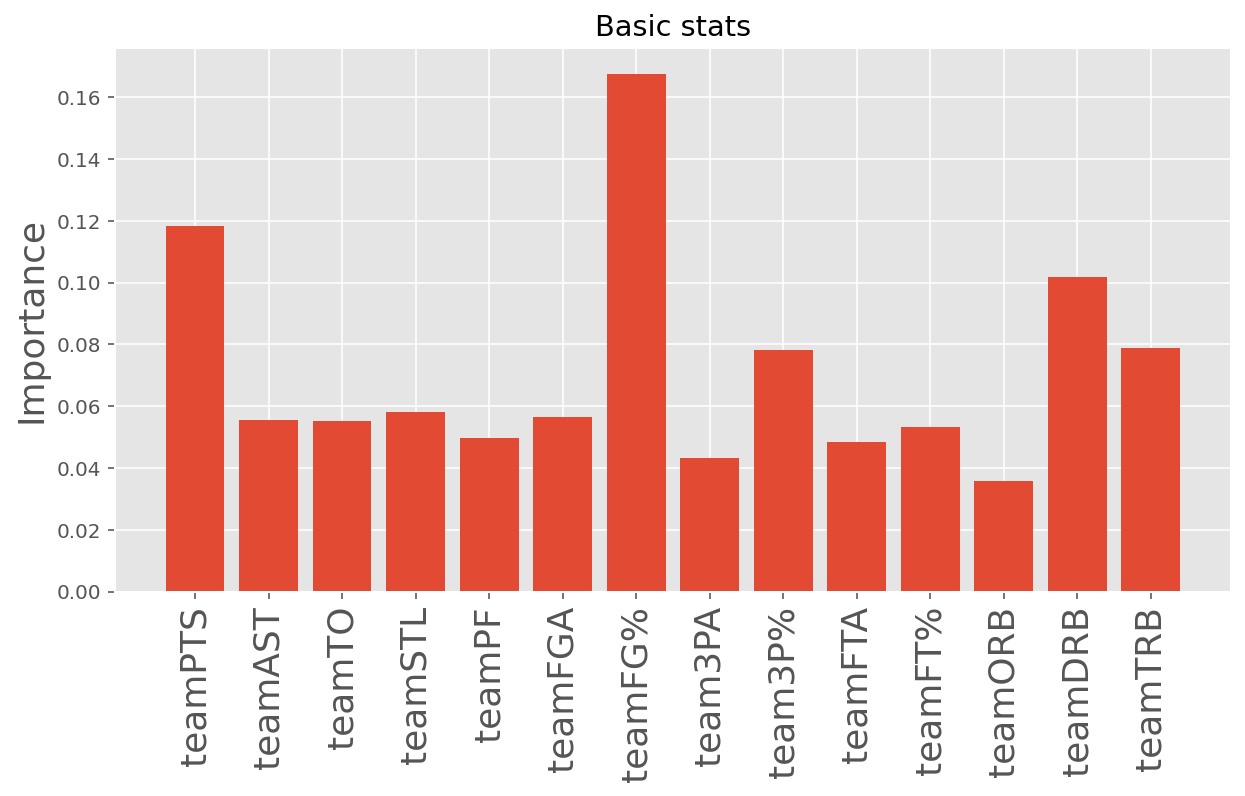

In [9]:
# Plots basic model

plt.figure(figsize=(10,5))
column_names = X_train_basic.columns
x_tick = np.array(range(len(column_names)))
plt.bar(x_tick, game_forest_basic.feature_importances_)
plt.xticks(x_tick, column_names, rotation=90, fontsize=18)
plt.ylabel('Importance', fontsize=18)
plt.title('Basic stats')

Text(0.5, 1.0, 'Advanced stats')

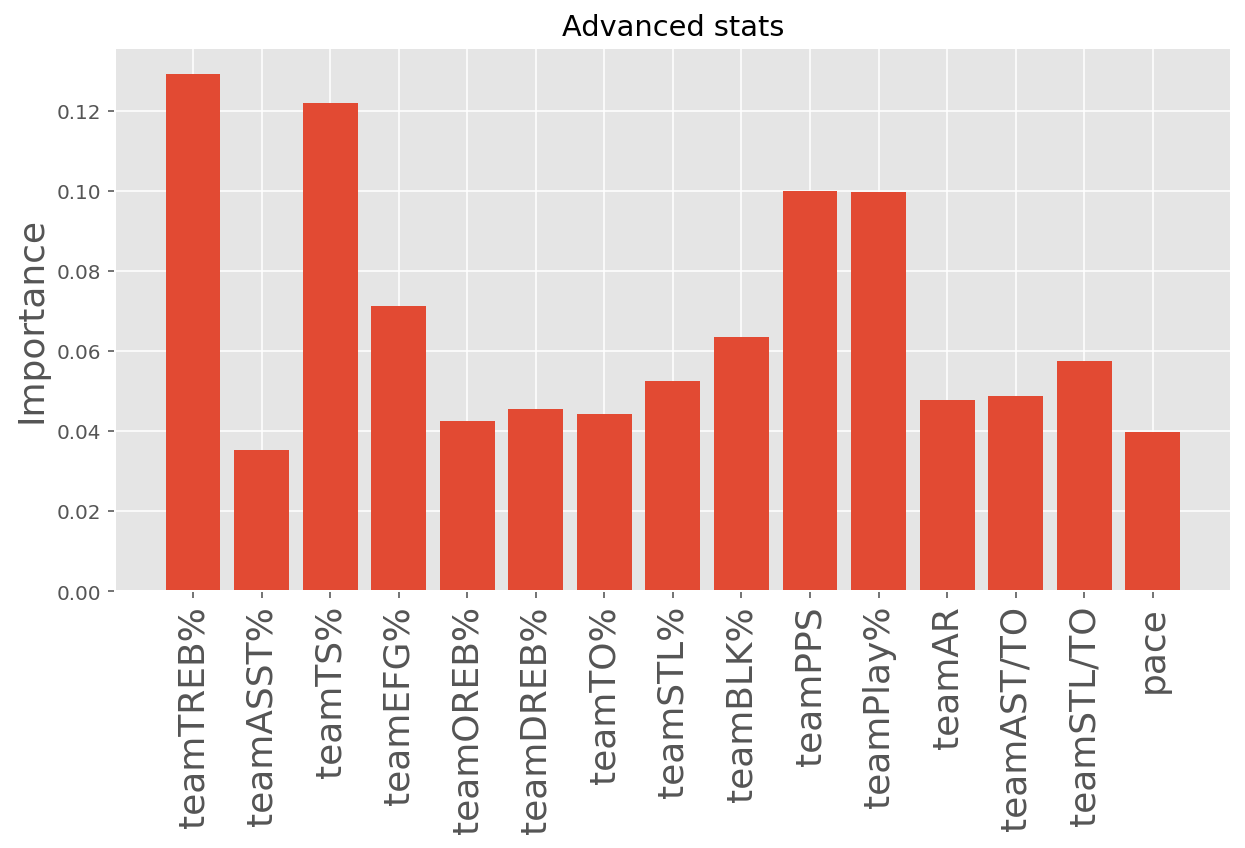

In [10]:
#Plots advanced model

plt.figure(figsize=(10,5))
column_names = X_train_advanced.columns
x_tick = np.array(range(len(column_names)))
plt.bar(x_tick, game_forest_advanced.feature_importances_)
plt.xticks(x_tick, column_names, rotation=90, fontsize=18)
plt.ylabel('Importance', fontsize=18)
plt.title('Advanced stats')

In [11]:
# Accuracy, f1 scores for basic test: forest

score_basic = game_forest_basic.score(X_test_basic, y_test_basic) 
y_test_basic_hat = game_forest_basic.predict(X_test_basic)
f1_score_basic = f1_score(y_test_basic, y_test_basic_hat) 

print("Basic forest scores:")
print("Accuracy score: ", score_basic)
print("f1 score: ", f1_score_basic)

Basic forest scores:
Accuracy score:  0.8069759566542499
f1 score:  0.8047945205479452


In [12]:
# Accuracy, f1 scores for advanced test: forest

score_advanced = game_forest_advanced.score(X_test_advanced, y_test_advanced) 
y_test_advanced_hat = game_forest_advanced.predict(X_test_advanced)
f1_score_advanced = f1_score(y_test_advanced, y_test_advanced_hat) 

print("Advanced forest scores:")
print("Accuracy score: ", score_advanced)
print("f1 score: ", f1_score_advanced)

Advanced forest scores:
Accuracy score:  0.7910599390450389
f1 score:  0.7896351858165701


In [13]:
game_knn_basic = neighbors.KNeighborsClassifier(15)
game_knn_basic.fit(X_train_basic, y_train_basic)

game_knn_advanced = neighbors.KNeighborsClassifier(15)
game_knn_advanced.fit(X_train_advanced, y_train_advanced)

KNeighborsClassifier(n_neighbors=15)

In [14]:
# Accuracy, f1 scores for basic test: knn

score_basic = game_knn_basic.score(X_test_basic, y_test_basic) 
y_test_basic_hat = game_knn_basic.predict(X_test_basic)
f1_score_basic = f1_score(y_test_basic, y_test_basic_hat) 

print("Basic knn scores:")
print("Accuracy score: ", score_basic)
print("f1 score: ", f1_score_basic)

Basic knn scores:
Accuracy score:  0.797832712495767
f1 score:  0.7965928449744464


In [15]:
# Accuracy, f1 scores for advanced test: knn

score_advanced = game_knn_advanced.score(X_test_advanced, y_test_advanced) 
y_test_advanced_hat = game_knn_advanced.predict(X_test_advanced)
f1_score_advanced = f1_score(y_test_advanced, y_test_advanced_hat) 

print("Advanced knn scores:")
print("Accuracy score: ", score_advanced)
print("f1 score: ", f1_score_advanced)

Advanced knn scores:
Accuracy score:  0.7246867592279038
f1 score:  0.722051282051282


In [16]:
# Confusion matrices for both knn models

conf_matrix_basic = sk.metrics.confusion_matrix(y_test_basic, y_test_basic_hat)
print("confusion matrix, basic")
print(conf_matrix_basic)

conf_matrix_advanced = sk.metrics.confusion_matrix(y_test_advanced, y_test_advanced_hat)
print("confusion matrix, advanced")
print(conf_matrix_advanced)


confusion matrix, basic
[[1187  272]
 [ 325 1169]]
confusion matrix, advanced
[[1084  395]
 [ 418 1056]]


In [17]:
features_basic = ['teamPTS', 'teamFG%', 'team3P%', 'teamDRB', 'teamTRB']

features_advanced = ['teamTREB%', 'teamTS%', 'teamEFG%', 'teamPPS', 'teamPlay%']

In [18]:
X_basic = data3[features_basic]
X_advanced = data3[features_advanced]
y = data3[target]

X_train_basic, X_test_basic, y_train_basic, y_test_basic = train_test_split(X_basic, y, test_size=0.2)
X_train_advanced, X_test_advanced, y_train_advanced, y_test_advanced = train_test_split(X_advanced, y, test_size=0.2)


In [19]:
game_knn_basic2 = neighbors.KNeighborsClassifier(15)
game_knn_basic2.fit(X_train_basic, y_train_basic)

game_knn_advanced2 = neighbors.KNeighborsClassifier(15)
game_knn_advanced2.fit(X_train_advanced, y_train_advanced)

KNeighborsClassifier(n_neighbors=15)

In [20]:
# Accuracy, f1 scores for basic test: knn round 2

score_basic = game_knn_basic2.score(X_test_basic, y_test_basic) 
y_test_basic_hat = game_knn_basic2.predict(X_test_basic)
f1_score_basic = f1_score(y_test_basic, y_test_basic_hat) 

print("Basic knn scores:")
print("Accuracy score: ", score_basic)
print("f1 score: ", f1_score_basic)

# Accuracy, f1 scores for advanced test: knn round 2

score_advanced = game_knn_advanced2.score(X_test_advanced, y_test_advanced) 
y_test_advanced_hat = game_knn_advanced2.predict(X_test_advanced)
f1_score_advanced = f1_score(y_test_advanced, y_test_advanced_hat) 

print("Advanced knn scores:")
print("Accuracy score: ", score_advanced)
print("f1 score: ", f1_score_advanced)

Basic knn scores:
Accuracy score:  0.7196071791398577
f1 score:  0.7238158772515011
Advanced knn scores:
Accuracy score:  0.7331527260413139
f1 score:  0.7350369872225958


In [21]:
# Confusion matrices for both knn models

conf_matrix_basic = sk.metrics.confusion_matrix(y_test_basic, y_test_basic_hat)
print("confusion matrix, basic")
print(conf_matrix_basic)

conf_matrix_advanced = sk.metrics.confusion_matrix(y_test_advanced, y_test_advanced_hat)
print("confusion matrix, advanced")
print(conf_matrix_advanced)

confusion matrix, basic
[[1040  415]
 [ 413 1085]]
confusion matrix, advanced
[[1072  388]
 [ 400 1093]]


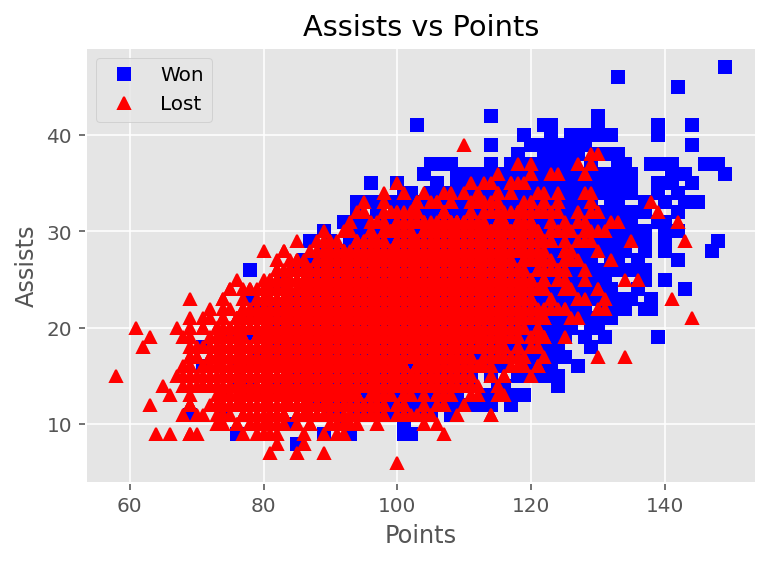

In [23]:
won = data2[data2['teamRslt'] == 'Win']
lost = data2[data2['teamRslt'] == 'Loss']

plt.plot(won['teamPTS'], won['teamAST'],'bs', label="Won")
plt.plot(lost['teamPTS'], lost['teamAST'],'r^', label="Lost")
plt.xlabel('Points')
plt.ylabel('Assists')
plt.title('Assists vs Points')
plt.legend(loc='upper left')
plt.show()

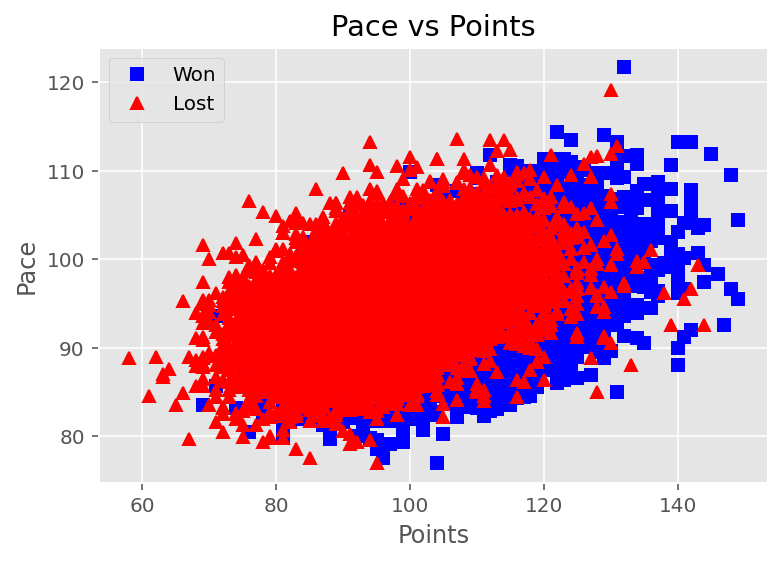

In [25]:
plt.plot(won['teamPTS'], won['pace'],'bs', label="Won")
plt.plot(lost['teamPTS'], lost['pace'],'r^', label="Lost")
plt.xlabel('Points')
plt.ylabel('Pace')
plt.title('Pace vs Points')
plt.legend(loc='upper left')
plt.show()

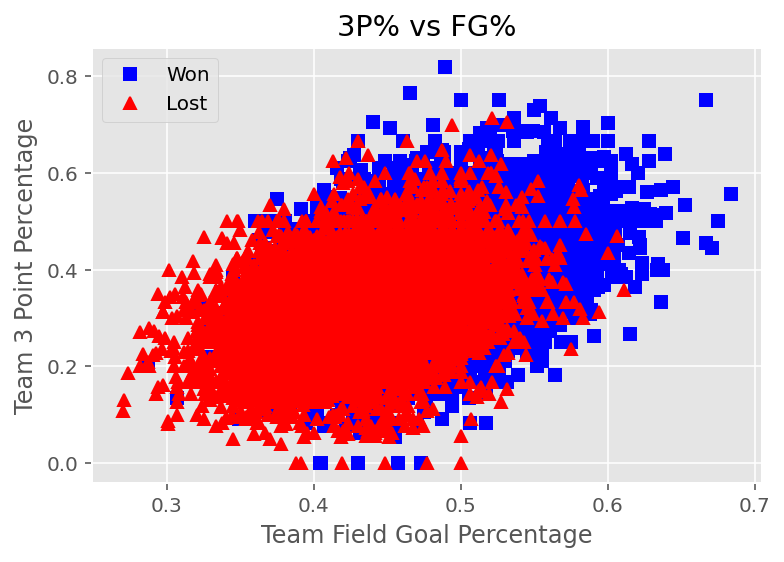

In [29]:
plt.plot(won['teamFG%'], won['team3P%'],'bs', label="Won")
plt.plot(lost['teamFG%'], lost['team3P%'],'r^', label="Lost")
plt.xlabel('Team Field Goal Percentage')
plt.ylabel('Team 3 Point Percentage')
plt.title('3P% vs FG%')
plt.legend(loc='upper left')
plt.show()

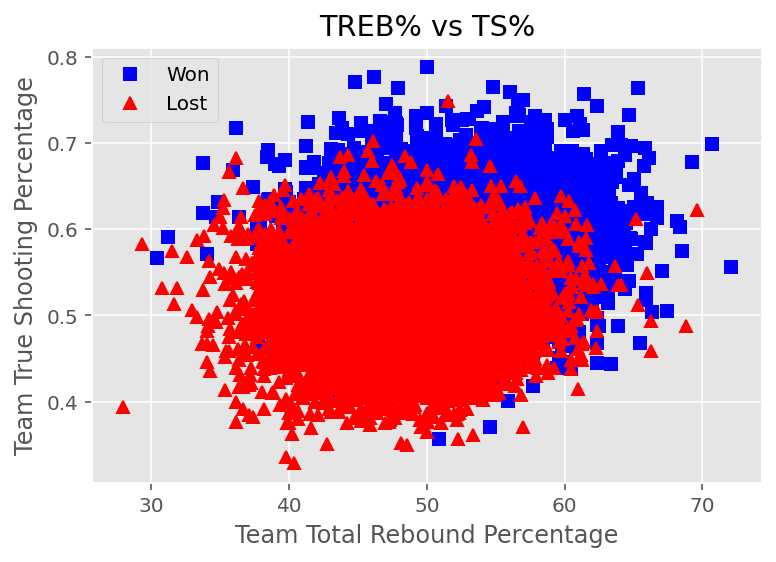

In [28]:
plt.plot(won['teamTREB%'], won['teamTS%'],'bs', label="Won")
plt.plot(lost['teamTREB%'], lost['teamTS%'],'r^', label="Lost")
plt.xlabel('Team Total Rebound Percentage')
plt.ylabel('Team True Shooting Percentage')
plt.title('TREB% vs TS%')
plt.legend(loc='upper left')
plt.show()